In [1]:
!pip install SPARQLWrapper

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
# SPARQL endpoint
endpoint_url = "https://query.wikidata.org/sparql"
sparql = SPARQLWrapper(endpoint_url)

# SPARQL query for count
count_query = """
SELECT (COUNT(DISTINCT ?artist) AS ?totalArtists) WHERE {
  ?artist wdt:P31 wd:Q5;                
          wdt:P172 wd:Q49085;           
          wdt:P106 wd:Q1028181.         

  OPTIONAL { ?artist wdt:P569 ?birthDate. }
  OPTIONAL { ?artist wdt:P19 ?birthPlace. }
  OPTIONAL { ?artist wdt:P570 ?deathDate. }
  OPTIONAL { ?artist wdt:P20 ?deathPlace. }
  OPTIONAL { ?artist wdt:P27 ?nationality. }
  OPTIONAL { ?artist wdt:P69 ?education. }
  OPTIONAL { ?artist wdt:P2031 ?yearsActive. }
  OPTIONAL { ?artist wdt:P800 ?notableWorkLabel. }
  OPTIONAL { ?artist wdt:P2561 ?knownForLabel. }
  OPTIONAL { ?artist wdt:P135 ?movement. }
  OPTIONAL { ?artist wdt:P136 ?style. }
  OPTIONAL { ?artist wdt:P856 ?officialWebsite. }

  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
"""

# Execute the query
sparql.setQuery(count_query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

# Extract and print the count
total_artists = results['results']['bindings'][0]['totalArtists']['value']
print(f"Total Artists Found: {total_artists}")

Total Artists Found: 535


In [3]:
# SPARQL endpoint
endpoint_url = "https://query.wikidata.org/sparql"
sparql = SPARQLWrapper(endpoint_url)

# Correctly formatted SPARQL query
query = """
SELECT DISTINCT ?artist ?artistLabel ?birthDate ?birthPlaceLabel ?deathDate ?deathPlaceLabel 
       ?nationalityLabel ?educationLabel ?yearsActive 
       ?notableWorkLabel ?knownForLabel ?styleLabel ?movementLabel ?officialWebsite WHERE {

  # Artists must be African American painters
  ?artist wdt:P31 wd:Q5;                # Human
          wdt:P172 wd:Q49085;           # African American ethnicity
          wdt:P106 wd:Q1028181.         # Painter occupation

  # Requesting labels explicitly
  OPTIONAL { ?artist wdt:P569 ?birthDate. }
  OPTIONAL { ?artist wdt:P19 ?birthPlace. }
  OPTIONAL { ?artist wdt:P570 ?deathDate. }
  OPTIONAL { ?artist wdt:P20 ?deathPlace. }

  # Correcting label returns for problematic fields
  OPTIONAL { ?artist wdt:P27 ?nationality. ?nationality rdfs:label ?nationalityLabel. FILTER(LANG(?nationalityLabel) = "en") }
  OPTIONAL { ?artist wdt:P69 ?education. ?education rdfs:label ?educationLabel. FILTER(LANG(?educationLabel) = "en") }
  OPTIONAL { ?artist wdt:P800 ?notableWork. ?notableWork rdfs:label ?notableWorkLabel. FILTER(LANG(?notableWorkLabel) = "en") }
  OPTIONAL { ?artist wdt:P2561 ?knownFor. ?knownFor rdfs:label ?knownForLabel. FILTER(LANG(?knownForLabel) = "en") }
  OPTIONAL { ?artist wdt:P135 ?movement. ?movement rdfs:label ?movementLabel. FILTER(LANG(?movementLabel) = "en") }
  OPTIONAL { ?artist wdt:P136 ?style. ?style rdfs:label ?styleLabel. FILTER(LANG(?styleLabel) = "en") }

  # Keep official websites as expected URLs
  OPTIONAL { ?artist wdt:P856 ?officialWebsite. }

  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
ORDER BY ?artistLabel
LIMIT 600
"""

# Run the SPARQL query
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()



In [4]:
# Extract results into a DataFrame
data = []
for item in results['results']['bindings']:
    data.append({
        'Artist': item['artistLabel']['value'],
        'Birth Date': item.get('birthDate', {}).get('value', ''),
        'Birth Place': item.get('birthPlaceLabel', {}).get('value', ''),
        'Death Date': item.get('deathDate', {}).get('value', ''),
        'Death Place': item.get('deathPlaceLabel', {}).get('value', ''),
        'Nationality': item.get('nationalityLabel', {}).get('value', ''),
        'Education': item.get('educationLabel', {}).get('value', ''),
        'Years Active': item.get('yearsActive', {}).get('value', ''),
        'Notable Work': item.get('notableWorkLabel', {}).get('value', ''),
        'Known For': item.get('knownForLabel', {}).get('value', ''),
        'Style': item.get('styleLabel', {}).get('value', ''),
        'Movement': item.get('movementLabel', {}).get('value', ''),
        'Official Website': item.get('officialWebsite', {}).get('value', '')
    })

# Convert to DataFrame
df_artists = pd.DataFrame(data)

In [5]:
df_artists.head(50)

,Artist,Birth Date,Birth Place,Death Date,Death Place,Nationality,Education,Years Active,Notable Work,Known For,Style,Movement,Official Website
0,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,University of Kansas,,,,portrait,Harlem Renaissance,
1,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,University of Nebraska–Lincoln,,,,portrait,Harlem Renaissance,
2,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,Topeka High School,,,,portrait,Harlem Renaissance,
3,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,University of Kansas,,,,still life,Harlem Renaissance,
4,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,University of Nebraska–Lincoln,,,,still life,Harlem Renaissance,
5,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,Topeka High School,,,,still life,Harlem Renaissance,
6,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,University of Kansas,,,,self-portrait,Harlem Renaissance,
7,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,University of Nebraska–Lincoln,,,,self-portrait,Harlem Renaissance,
8,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,Topeka High School,,,,self-portrait,Harlem Renaissance,
9,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,University of Kansas,,,,history painting,Harlem Renaissance,


In [6]:
df_artists.tail(50)

,Artist,Birth Date,Birth Place,Death Date,Death Place,Nationality,Education,Years Active,Notable Work,Known For,Style,Movement,Official Website
550,Hale Woodruff,1900-08-26T00:00:00Z,Cairo Junction,1980-09-06T00:00:00Z,New York City,United States of America,Herron School of Art and Design,,,,,,
551,Harlan Jackson,1918-01-01T00:00:00Z,Cleburne,1993-01-01T00:00:00Z,,United States of America,Emporia State University,,,,abstract art,,
552,Harlan Jackson,1918-01-01T00:00:00Z,Cleburne,1993-01-01T00:00:00Z,,United States of America,California School of Fine Arts,,,,abstract art,,
553,Harlan Jackson,1918-01-01T00:00:00Z,Cleburne,1993-01-01T00:00:00Z,,United States of America,Hans Hoffman School of Fine Art,,,,abstract art,,
554,Harvey Ramseur,,Greensboro,,,,Occidental College,,,,relief sculpture,,
555,Harvey Ramseur,,Greensboro,,,,North Carolina Central University,,,,relief sculpture,,
556,Harvey Ramseur,,Greensboro,,,,University of Connecticut,,,,relief sculpture,,
557,Hayward Oubre,1916-01-01T00:00:00Z,,2006-01-01T00:00:00Z,,United States of America,,,,,,,
558,Hector Hyppolite,1894-09-16T00:00:00Z,Saint-Marc,1948-06-09T00:00:00Z,,Haiti,,,,,,,
559,Henry Ossawa Tanner,1859-06-21T00:00:00Z,Pittsburgh,1937-05-24T00:00:00Z,6th arrondissement of Paris,United States of America,Académie Julian,,The Thankful Poor,,landscape painting,realism,


In [7]:
df_artists.sample(5)

,Artist,Birth Date,Birth Place,Death Date,Death Place,Nationality,Education,Years Active,Notable Work,Known For,Style,Movement,Official Website
144,Barbara Chase-Riboud,1939-06-26T00:00:00Z,Philadelphia,,,France,Philadelphia High School for Girls,,,,fiction,Black Arts Movement,
335,Dana Chandler,1941-04-07T00:00:00Z,Lynn,,,United States of America,Massachusetts College of Art and Design,,,,,Black Aesthetic,
120,Aubrey Brown,,"Washington, D.C.",,,,Corcoran College of Art and Design,,,,,,
285,Charles Williams,1942-01-01T00:00:00Z,,1999-01-01T00:00:00Z,,,,,,,,,
269,Charles E. Mitchell,,Petersburg,2005-03-01T00:00:00Z,"Washington, D.C.",,Virginia State University,,,,,,


In [8]:
df_artists.columns

Index(['Artist', 'Birth Date', 'Birth Place', 'Death Date', 'Death Place',
       'Nationality', 'Education', 'Years Active', 'Notable Work', 'Known For',
       'Style', 'Movement', 'Official Website'],
      dtype='object')

In [9]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist            600 non-null    object
 1   Birth Date        600 non-null    object
 2   Birth Place       600 non-null    object
 3   Death Date        600 non-null    object
 4   Death Place       600 non-null    object
 5   Nationality       600 non-null    object
 6   Education         600 non-null    object
 7   Years Active      600 non-null    object
 8   Notable Work      600 non-null    object
 9   Known For         600 non-null    object
 10  Style             600 non-null    object
 11  Movement          600 non-null    object
 12  Official Website  600 non-null    object
dtypes: object(13)
memory usage: 61.1+ KB


In [12]:
# Count unique artists
df_artists['Artist'].nunique()

208

In [57]:
# Group by unique artist and consolidate fields
df_cleaned = df_artists.groupby(
    ["Artist", "Birth Date", "Birth Place", "Death Date", "Death Place", "Nationality", "Official Website"],
    as_index=False
).agg({
    "Education": lambda x: ', '.join(pd.unique(x.dropna())),
    "Notable Work": lambda x: ', '.join(pd.unique(x.dropna())),
    "Style": lambda x: ', '.join(pd.unique(x.dropna())),
    "Movement": lambda x: ', '.join(pd.unique(x.dropna()))
})


In [61]:
df_cleaned.columns

Index(['Artist', 'Birth Date', 'Birth Place', 'Death Date', 'Death Place',
       'Nationality', 'Official Website', 'Education', 'Notable Work', 'Style',
       'Movement'],
      dtype='object')

In [59]:
df_cleaned.head()

,Artist,Birth Date,Birth Place,Death Date,Death Place,Nationality,Official Website,Education,Notable Work,Style,Movement
0,Aaron Douglas,1899-05-26T00:00:00Z,Topeka,1979-02-02T00:00:00Z,Nashville,United States of America,,"University of Kansas, University of Nebraska–L...",,"portrait, still life, self-portrait, history p...",Harlem Renaissance
1,Aaron Ibn Pori Pitts,1941-01-01T00:00:00Z,Detroit,2022-08-13T00:00:00Z,,,,"Wayne State University, Los Angeles City College",,,
2,Adah Isaacs Menken,1835-06-15T00:00:00Z,New Orleans,1868-08-10T00:00:00Z,Paris,United States of America,,,,,
3,Adam Alli,,,,,,,,,,
4,Adolphus Ealey,1941-02-22T00:00:00Z,Atlanta,1992-11-11T00:00:00Z,"Washington, D.C.",United States of America,,"Académie de la Grande Chaumière, University of...",,,


In [63]:
from datetime import datetime
def reformat_date(date_str):
    try:
        # Parse the date and reformat it
        return datetime.strptime(date_str, "%Y-%m-%dT%H:%M:%SZ").strftime("%B %d, %Y")
    except ValueError:
        # Return the original value if parsing fails
        return date_str
# Apply the function to the Birth Date and Death Date columns
df_cleaned["Birth Date"] = df_cleaned["Birth Date"].apply(reformat_date)
df_cleaned["Death Date"] = df_cleaned["Death Date"].apply(reformat_date)

# Display the updated DataFrame
df_cleaned.head()

,Artist,Birth Date,Birth Place,Death Date,Death Place,Nationality,Official Website,Education,Notable Work,Style,Movement
0,Aaron Douglas,"May 26, 1899",Topeka,"February 02, 1979",Nashville,United States of America,,"University of Kansas, University of Nebraska–L...",,"portrait, still life, self-portrait, history p...",Harlem Renaissance
1,Aaron Ibn Pori Pitts,"January 01, 1941",Detroit,"August 13, 2022",,,,"Wayne State University, Los Angeles City College",,,
2,Adah Isaacs Menken,"June 15, 1835",New Orleans,"August 10, 1868",Paris,United States of America,,,,,
3,Adam Alli,,,,,,,,,,
4,Adolphus Ealey,"February 22, 1941",Atlanta,"November 11, 1992","Washington, D.C.",United States of America,,"Académie de la Grande Chaumière, University of...",,,


In [65]:
df_cleaned["Movement"].unique()

array(['Harlem Renaissance', '', 'contemporary art', 'New Negro Movement',
       'Color Field, Washington Color School, abstract expressionism',
       'Black Arts Movement', 'Black Aesthetic',
       'Cubism, figurative art, minimalism, surrealism', 'Expressionism',
       'outsider art', 'Harlem Renaissance, abstract expressionism',
       'Black Atlantic, contemporary art', 'Cubism',
       'contemporary art, conceptual art, postmodernism',
       'abstract expressionism', 'Impressionism', 'Black Atlantic',
       'feminist art, postmodernism', 'realism, dualism', 'feminist art',
       'Color Field', 'conceptual art', 'Fluxus',
       'Cass Corridor art movement', 'Black Atlantic, conceptual art',
       'realism', 'Pan-Africanism', 'naïve art'], dtype=object)

In [18]:
df_cleaned["Birth Date"].nunique()

154

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Split multiple movements into separate rows
df_cleaned = df_cleaned.assign(Movement=df_cleaned["Movement"].str.split(", ")).explode("Movement")

# Display unique movement values after splitting
unique_movements = df_cleaned["Movement"].unique()
print(unique_movements)

['Harlem Renaissance' '' 'contemporary art' 'New Negro Movement'
 'Color Field' 'Washington Color School' 'abstract expressionism'
 'Black Arts Movement' 'Black Aesthetic' 'Cubism' 'figurative art'
 'minimalism' 'surrealism' 'Expressionism' 'outsider art' 'Black Atlantic'
 'conceptual art' 'postmodernism' 'Impressionism' 'feminist art' 'realism'
 'dualism' 'Fluxus' 'Cass Corridor art movement' 'Pan-Africanism'
 'naïve art']


In [71]:
# Normalize the Movement column
def normalize_movement(movement):
    # Remove extra spaces and standardize case
    if pd.notnull(movement) and movement.strip() != '':  # Check for both NaN and empty strings
        return movement.strip().title()  # Remove spaces and convert to Title Case
    else:
        return 'Unknown'  # Return 'Unknown' for NaN or empty strings

# Apply normalization to the Movement column
df_cleaned["Movement"] = df_cleaned["Movement"].apply(normalize_movement)

# Display unique movements after normalization
unique_movements = df_cleaned["Movement"].unique()
print("Normalized Movements:")
print(unique_movements)

Normalized Movements:
['Harlem Renaissance' 'Unknown' 'Contemporary Art' 'New Negro Movement'
 'Color Field' 'Washington Color School' 'Abstract Expressionism'
 'Black Arts Movement' 'Black Aesthetic' 'Cubism' 'Figurative Art'
 'Minimalism' 'Surrealism' 'Expressionism' 'Outsider Art' 'Black Atlantic'
 'Conceptual Art' 'Postmodernism' 'Impressionism' 'Feminist Art' 'Realism'
 'Dualism' 'Fluxus' 'Cass Corridor Art Movement' 'Pan-Africanism'
 'Naïve Art']


In [73]:
# Ensure Birth Date and Death Date are datetime objects
df_cleaned["Birth Date"] = pd.to_datetime(df_cleaned["Birth Date"], errors="coerce")
df_cleaned["Death Date"] = pd.to_datetime(df_cleaned["Death Date"], errors="coerce")

In [23]:
df_cleaned.head()

,Artist,Birth Date,Birth Place,Death Date,Death Place,Nationality,Education,Notable Work,Style,Movement
0,Aaron Douglas,1899-05-26,Topeka,1979-02-02,Nashville,United States of America,"University of Kansas, University of Nebraska–L...",,"portrait, still life, self-portrait, history p...",Harlem Renaissance
1,Aaron Ibn Pori Pitts,1941-01-01,Detroit,2022-08-13,,,"Wayne State University, Los Angeles City College",,,
2,Adah Isaacs Menken,1835-06-15,New Orleans,1868-08-10,Paris,United States of America,,,,
3,Adam Alli,NaT,,NaT,,,,,,
4,Adolphus Ealey,1941-02-22,Atlanta,1992-11-11,"Washington, D.C.",United States of America,"Académie de la Grande Chaumière, University of...",,,


/var/folders/2z/wrbf0xfj7dx7p5r_t84w_f8w0000gn/T/ipykernel_21086/2476471731.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


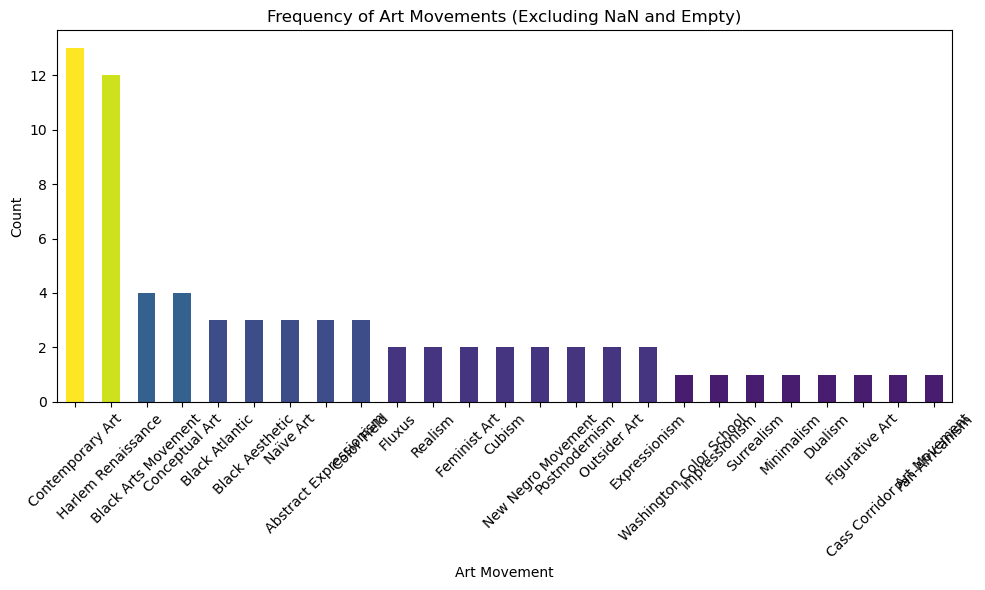

In [187]:
# Drop NaN or empty values in the "Movement" column
filtered_df = df_cleaned[df_cleaned["Movement"].notna()]  # Exclude NaNs
filtered_df = filtered_df[filtered_df["Movement"] != "Unknown"]  # Exclude empty strings

cmap = plt.cm.get_cmap('viridis')
# Count occurrences of each movement
movement_counts = filtered_df["Movement"].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
movement_counts.plot(kind="bar", color=cmap(movement_counts.values / movement_counts.max()))
plt.title("Frequency of Art Movements (Excluding NaN and Empty)")
plt.xlabel("Art Movement")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
# Normalize Movement Dates as a dictionary
movement_dates = {
    "Harlem Renaissance": ("1920-01-01", "1939-12-31"),
    "Contemporary Art": ("1970-01-01", ""),
    "New Negro Movement": ("1920-01-01", "1939-12-31"),
    "Washington Color School": ("1950-01-01", "1969-12-31"),
    "Color Field": ("1940-01-01", "1969-12-31"),
    "Abstract Expressionism": ("1940-01-01", "1959-12-31"),
    "Black Arts Movement": ("1960-01-01", "1979-12-31"),
    "Black Aesthetic": ("1960-01-01", "1979-12-31"),
    "Cubism": ("1907-01-01", "1914-12-31"),
    "Figurative Art": ("1900-01-01", ""),
    "Minimalism": ("1960-01-01", "1979-12-31"),
    "Surrealism": ("1917-01-01", "1959-12-31"),
    "Expressionism": ("1905-01-01", "1929-12-31"),
    "Outsider Art": ("1900-01-01", ""),
    "Black Atlantic": ("1990-01-01", ""),
    "Conceptual Art": ("1965-01-01", "1975-12-31"),
    "Postmodernism": ("1970-01-01", ""),
    "Impressionism": ("1860-01-01", "1889-12-31"),
    "Feminist Art": ("1970-01-01", ""),
    "Dualism": ("", ""),
    "Realism": ("1840-01-01", "1889-12-31"),
    "Fluxus": ("1960-01-01", "1979-12-31"),
    "Cass Corridor Art Movement": ("1960-01-01", "1989-12-31"),
    "Pan-Africanism": ("1900-01-01", ""),
    "Naïve Art": ("1800-01-01", "")
}

# Add Start Date and End Date columns to the DataFrame
df_cleaned["Start Date"] = df_cleaned["Movement"].map(lambda x: movement_dates.get(x, ("", ""))[0])
df_cleaned["End Date"] = df_cleaned["Movement"].map(lambda x: movement_dates.get(x, ("", ""))[1])

# Ensure the new date columns have consistent formats
df_cleaned["Start Date"] = pd.to_datetime(df_cleaned["Start Date"], errors="coerce")
df_cleaned["End Date"] = pd.to_datetime(df_cleaned["End Date"], errors="coerce")

# Display the updated DataFrame
df_cleaned.head()


,Artist,Birth Date,Birth Place,Death Date,Death Place,Nationality,Official Website,Education,Notable Work,Style,Movement,Start Date,End Date
0,Aaron Douglas,1899-05-26,Topeka,1979-02-02,Nashville,United States of America,,"University of Kansas, University of Nebraska–L...",,"portrait, still life, self-portrait, history p...",Harlem Renaissance,1920-01-01,1939-12-31
1,Aaron Ibn Pori Pitts,1941-01-01,Detroit,2022-08-13,,,,"Wayne State University, Los Angeles City College",,,Unknown,NaT,NaT
2,Adah Isaacs Menken,1835-06-15,New Orleans,1868-08-10,Paris,United States of America,,,,,Unknown,NaT,NaT
3,Adam Alli,NaT,,NaT,,,,,,,Unknown,NaT,NaT
4,Adolphus Ealey,1941-02-22,Atlanta,1992-11-11,"Washington, D.C.",United States of America,,"Académie de la Grande Chaumière, University of...",,,Unknown,NaT,NaT


In [81]:
df_cleaned["Birth Place"].unique()

array(['Topeka', 'Detroit', 'New Orleans', '', 'Atlanta', 'Berber',
       'Ijebu Ode', 'Washington, D.C.', 'New York City', 'Marshall',
       'Los Angeles', 'North Plainfield', 'Philadelphia', 'Champaign',
       'Palestine', 'Columbus', 'Harlem', 'Gary', 'Gainesville',
       'South Euclid', 'Memphis', 'Rockville Centre', 'Wilmington',
       'Fort Worth', 'North Buxton', 'Georgetown', 'Chicago',
       'Harrisburg', 'Nicetown-Tioga', 'Lucea', 'Knoxville', 'Onitsha',
       'Paterson', 'Windfall', 'Richmond', 'Madison', 'Plainview',
       'Alexandria', 'Wyco', 'Benton', 'Pleasant Hill', 'Virginia',
       'Cleveland', 'Louisville', 'Ocala', 'Jackson', 'Joliet',
       'Indianapolis', 'Martinsburg', 'Arkansas', 'Manhattan',
       'Charlotte', 'Brunswick', 'Georgia', 'Petersburg', 'Hartford',
       'Charleston', 'Montpellier', 'Madisonville', 'The Carolinas',
       'Manchester', 'Kingston', 'Rockingham', 'Cloutierville',
       'Louisiana', 'New Rochelle', 'Baskerville', 'South Hi

In [83]:
df_cleaned["Death Place"].unique()

array(['Nashville', '', 'Paris', 'Washington, D.C.', 'Khartoum', 'Lagos',
       'Boston', 'Telford', 'Chicago', 'New York City',
       'Westchester County', 'Sugar Land', 'London', 'Guilderland',
       'Chicago Heights', 'New London', 'Kingston',
       '14th arrondissement of Paris', 'Ikoyi', 'New Paltz',
       'Los Angeles', 'Montgomery', 'Rome', 'Evesham Township', 'Texas',
       'New Hope', 'Connecticut', 'Montego Bay', 'Oakland',
       'Natchitoches', 'Natchitoches Parish', 'Burbank', 'Montclair',
       'Philadelphia', 'Manassas', 'Winston-Salem', 'Detroit',
       'Wilmington', 'Providence', 'Charleston', 'Long Island',
       'Cuernavaca', 'Brooklyn', 'New York', 'Bedford', 'Lagos State',
       'Englewood', 'Silver Spring', 'Columbia', 'Harlem Hospital Center',
       'Memphis', 'Palm Coast', 'Nogent-sur-Marne', 'Charlottesville',
       'New Orleans', 'St. Peter', '6th arrondissement of Paris',
       'Stockholm', 'West Chester'], dtype=object)

In [141]:
df_cleaned.sample(20)

,Artist,Birth Date,Birth Place,Death Date,Death Place,Nationality,Official Website,Education,Notable Work,Style,Movement,Start Date,End Date,Lifespan
138,Dell Godbold,1941-04-03,Kansas City,2017-04-17,,,,"Wichita State University, Kansas City Art Inst...",,,Unknown,NaT,NaT,76.038330
104,Chevelle Moore,NaT,,NaT,,,http://www.chevellemoorejones.com/,Maryland Institute College of Art,,narrative art,Unknown,NaT,NaT,NaN
172,Emma Amos,1937-03-16,Atlanta,2020-05-20,Bedford,United States of America,https://emmaamos.com/,"New York University, Antioch College, Central ...",,,Feminist Art,1970-01-01,NaT,83.178645
166,Elizabeth Catlett,1915-04-15,"Washington, D.C.",2012-04-02,Cuernavaca,United States of America,,"Escuela Nacional de Pintura, Escultura y Graba...","Black Unity, Students Aspire",social-artistic project,Harlem Renaissance,1920-01-01,1939-12-31,96.966461
16,Allan Randall Freelon,1895-09-02,Philadelphia,1960-01-01,Telford,United States of America,,"University of Pennsylvania, Tyler School of Ar...",,,New Negro Movement,1920-01-01,1939-12-31,64.328542
83,Carolyn Norris,1948-04-23,Martinsburg,NaT,,United States of America,,,,,Unknown,NaT,NaT,NaN
102,Charlotte Riley-Webb,NaT,Atlanta,NaT,,,http://www.charlotterileywebb.com/,Cleveland Institute of Art,,abstract painting,Unknown,NaT,NaT,NaN
199,Frederick Cornelius Alston,1895-10-31,Wilmington,1987-08-01,Columbia,United States of America,,,,,Unknown,NaT,NaT,91.748118
58,Ben F. Jones,1941-05-26,Paterson,NaT,,,https://www.benfjones.net/,"New York University, Pratt Institute, William ...",,,Unknown,NaT,NaT,NaN
85,Carroll Sockwell,1943-01-01,Manhattan,1992-01-01,"Washington, D.C.",United States of America,,,,,Unknown,NaT,NaT,48.999316


In [191]:
df_cleaned['Birth Date'].sort_values(ascending= False)

75    2000-01-01
126   1981-01-01
28    1973-08-30
81    1971-01-01
105   1968-10-10
         ...    
185          NaT
203          NaT
221          NaT
227          NaT
232          NaT
Name: Birth Date, Length: 255, dtype: datetime64[ns]

In [199]:
df_cleaned.iloc[]

Artist                          Bill Traylor
Birth Date               1854-04-01 00:00:00
Birth Place                    Pleasant Hill
Death Date               1949-10-23 00:00:00
Death Place                       Montgomery
Nationality         United States of America
Official Website                            
Education                                   
Notable Work                                
Style                                       
Movement                        Outsider Art
Start Date               1900-01-01 00:00:00
End Date                                 NaT
Lifespan                           95.559206
Name: 71, dtype: object

In [175]:
df_cleaned['Artist'].nunique()

208

In [203]:
df_cleaned.to_csv('df_artists.csv')

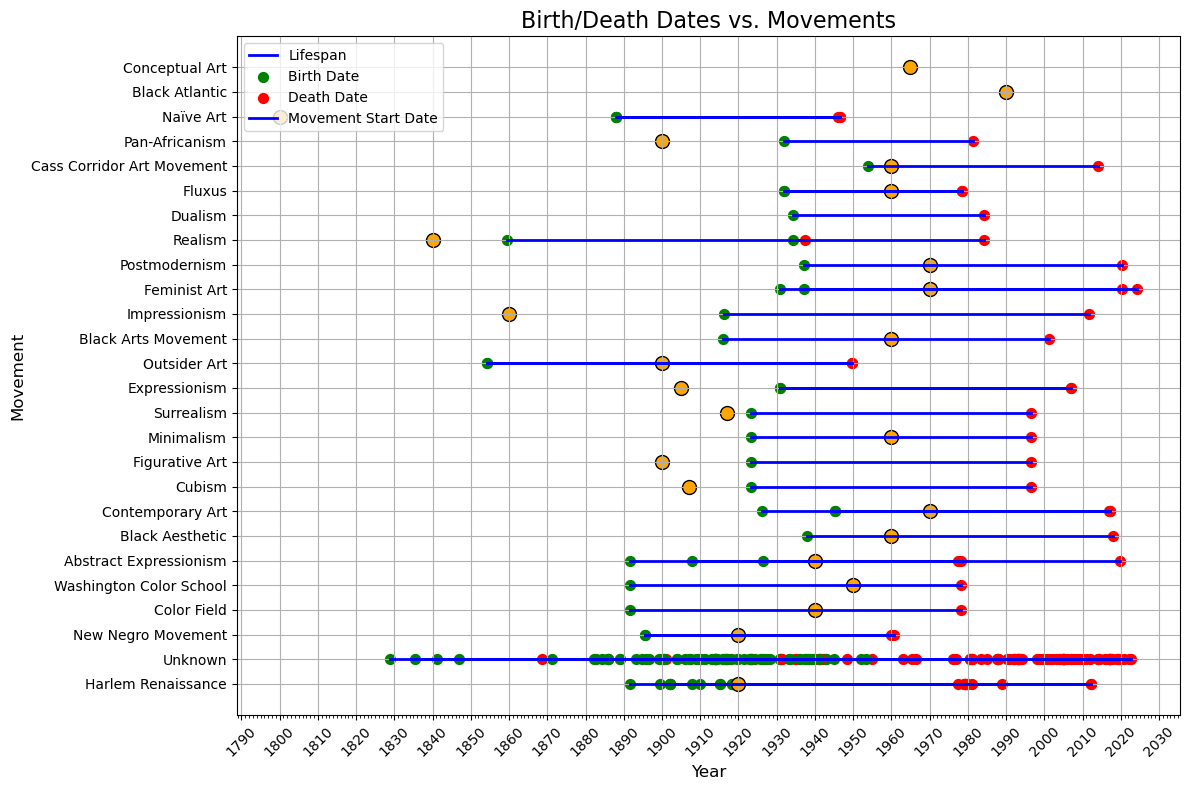

In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot birth and death dates
for _, row in df_cleaned.iterrows():
    if pd.notnull(row["Birth Date"]) and pd.notnull(row["Death Date"]):
        ax.plot([row["Birth Date"], row["Death Date"]], [row["Movement"]]*2, color='blue', linewidth=2)
        ax.scatter(row["Birth Date"], row["Movement"], color='green', label='Birth Date', s=50)
        ax.scatter(row["Death Date"], row["Movement"], color='red', label='Death Date', s=50)

# Plot movement start dates
for movement, group in df_cleaned.groupby("Movement"):
    if pd.notnull(group["Start Date"].iloc[0]):
        ax.scatter(group["Start Date"].iloc[0], movement, color='orange', label='Movement Start Date', s=100, edgecolors='black')

# Format the plot
ax.xaxis.set_major_locator(mdates.YearLocator(10))  # Major ticks every 10 years
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every 1 year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
ax.set_title("Birth/Death Dates vs. Movements", fontsize=16)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Movement", fontsize=12)
plt.legend(["Lifespan", "Birth Date", "Death Date", "Movement Start Date"], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

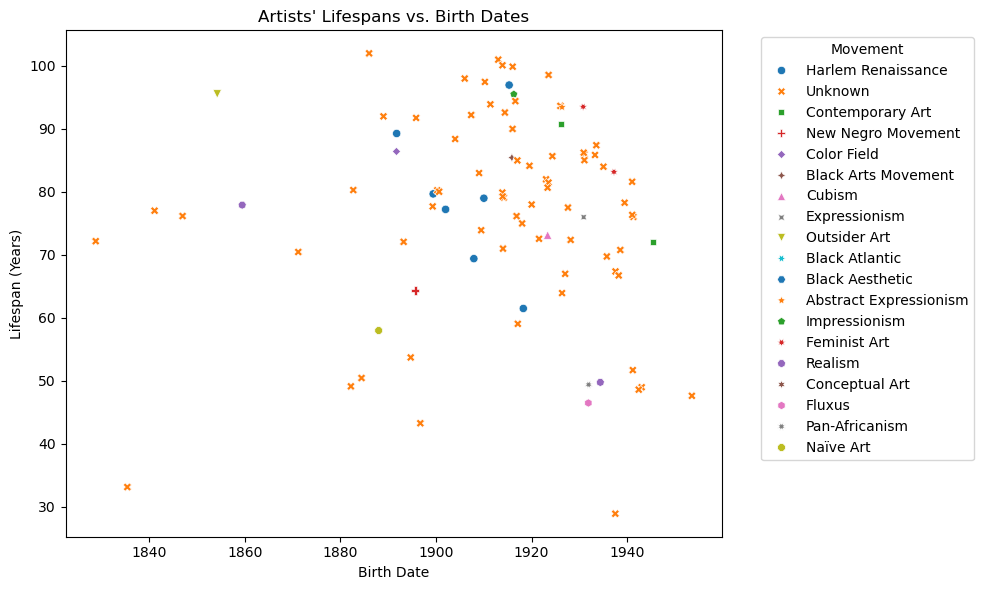

In [129]:
df_cleanedscatter = df_cleaned[(df_cleaned['Birth Date'] != 'Unknown') & (df_cleaned['Death Date'] != 'Unknown')]

df_cleanedpscatter = df_cleaned.loc[~df_cleaned.duplicated()]
df_cleanedscatter = df_cleaned[~df_cleaned['Birth Date'].duplicated()]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleanedscatter, x="Birth Date", y="Lifespan", hue="Movement", style="Movement", palette="tab10")
plt.title("Artists' Lifespans vs. Birth Dates")
plt.xlabel("Birth Date")
plt.ylabel("Lifespan (Years)")
plt.legend(title="Movement", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [169]:
# Filter artists who attended Pratt Institute
pratt_artists = df_cleaned[df_cleaned['Education'].str.contains('Pratt Institute')]

# Extract relevant information
pratt_data = pratt_artists[['Artist', 'Birth Date', 'Education', 'Movement']]

In [171]:
pratt_data.head()

,Artist,Birth Date,Education,Movement
32,Annette Fortt,1944-01-01,"Pratt Institute, University of Memphis",Unknown
37,Arthur Monroe,1935-01-01,"University of California, Berkeley, City Colle...",Unknown
58,Ben F. Jones,1941-05-26,"New York University, Pratt Institute, William ...",Unknown
207,George H. Smith,1943-01-01,"Pratt Institute, Howard University",Unknown


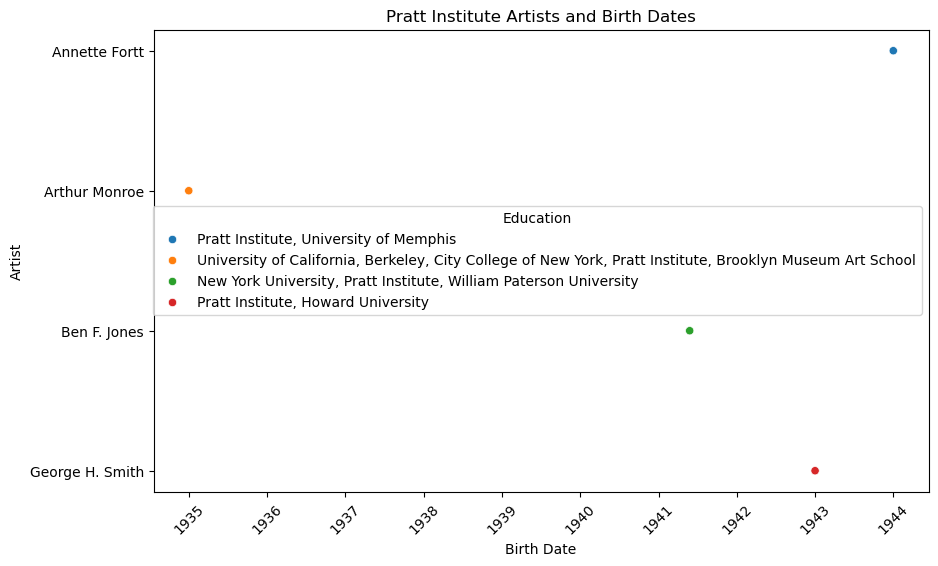

In [167]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pratt_data, x='Birth Date', y='Artist', hue='Education')
plt.title('Pratt Institute Artists and Birth Dates')
plt.xlabel('Birth Date')
plt.ylabel('Artist')
plt.xticks(rotation=45)
plt.show()